# Download market data

In [335]:
from alpha_vantage.timeseries import TimeSeries
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&apikey=UKVMJDTIVX11HPUB'
r = requests.get(url)
data = r.json()


In [81]:
ts = TimeSeries(key='TWCLTLF7YO76B0IA', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='SCS',interval='1min', outputsize='full')
pprint(data.tail(2))


                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-10-22 09:28:00    12.69    12.70   12.69     12.70     3707.0
2021-10-22 09:27:00    12.69    12.69   12.69     12.69     5000.0


(6328,)


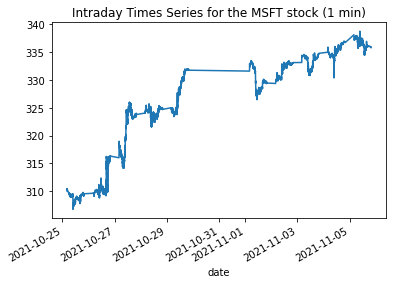

In [615]:
ts = TimeSeries(key='TWCLTLF7YO76B0IA', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
print(data['4. close'].shape)
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()


In [485]:
ts = TimeSeries(key='TWCLTLF7YO76B0IA', output_format='pandas')
data, meta_data = ts.get_daily(symbol='VALE3.SAO', outputsize='full')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2005-01-05,72.05,72.43,70.40,71.30,434660.0
2005-01-04,74.86,75.00,71.52,71.80,281421.0
2005-01-03,76.50,77.50,74.31,74.85,256752.0


# Daily prices

In [438]:
from datetime import date
import numpy as np
import random

In [332]:
def getData_Alpha(assets,start,end):
  
    i = 1
    for asset in assets:
        print(asset,'\n')
        #df_assets_complete = yf.download(asset, start=start, end=end)
        df_assets_complete, meta_data = ts.get_daily(symbol=asset, outputsize='full')
        #df_assets_complete.index = pd.to_datetime(df_assets_complete.index, format="%Y-%m-%d")
        df_assets_complete = df_assets_complete.sort_index(axis=0, ascending=True)
        #df_assets_completed.to_csv('C:/Users/HP/Desktop/TesisCódigos/Data/df_assets_completed.csv')
        if df_assets_complete.index[0].year == int(start[0:4]) and df_assets_complete.index[0].month == int(start[5:7]) and df_assets_complete.index[0].day == int(start[9:11]):
            if i==1:
                #df_assets_close = yf.download(asset, start=start, end=end)
                df_assets_close, meta_data = ts.get_daily(symbol=asset, outputsize='full')
                df_assets_close.index = pd.to_datetime(df_assets_close.index, format="%Y-%m-%d")
                df_assets_close = df_assets_close.sort_index(axis=0, ascending=True)
                # select columns
                df_assets_close = df_assets_close[['4. close']]
                # rename columns
                result_df = df_assets_close.rename(columns={'4. close':asset})
            else:
                #df_assets_close2 = yf.download(asset, start=start, end=end)
                df_assets_close2, meta_data = ts.get_daily(symbol=asset, outputsize='full')
                df_assets_close2.index = pd.to_datetime(df_assets_close2.index, format="%Y-%m-%d")
                df_assets_close2 = df_assets_close2.sort_index(axis=0, ascending=True)
                # select columns
                df_assets_close2 = df_assets_close2[['4. close']]
                # rename columns
                df_assets_close2 = df_assets_close2.rename(columns={'4. close':asset})
                # mergin
                result_df = result_df.merge(df_assets_close2, left_index=True, right_index=True)
            i+=1
        else:
            #print('no value!')
            continue

    return result_df

In [420]:
nyse_symbols = ['AB', 'ABM', 'ABT', 'ADM', 'AEG', 'AEM', 'AFG', 'AFL', 'AIG', 'AIN', 'AIR',
           'AIT', 'AJG', 'ALK', 'ALX', 'AME', 'AON', 'AVY', 'AWR', 'BAC', 'BAM', 'BBVA',
           'BCE', 'BDN', 'BEN', 'BIG', 'BIO', 'BTI', 'CAJ', 'CAL', 'CDE', 'CLX', 'COP']


In [328]:
nyse_components = getData_Alpha(assets=nyse_symbols,start='1999-11-01',end='2021-08-30')

AB 

1
ABM 

1
ABT 

1
ADM 

1
AEG 

1
AEM 

1
AFG 

1
AFL 

1
AIG 

1
AIN 

1
AIR 

1
AIT 

1
AJG 

1
ALK 

1
ALX 

1
AME 

1
AON 

1
AVY 

1
AWR 

1
BAC 

1
BAM 

1
BBVA 

1
BCE 

1
BDN 

1
BEN 

1
BIG 

1
BIO 

1
BTI 

1
CAJ 

1
CAL 

1
CDE 

1
CLX 

1
COP 

1


In [336]:
nyse_components.head()

,AB,ABM,ABT,ADM,AEG,AEM,AFG,AFL,AIG,AIN,...,BDN,BEN,BIG,BIO,BTI,CAJ,CAL,CDE,CLX,COP
date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,28.75,23.69,40.31,11.90,89.94,8.12,28.81,49.06,100.30,15.19,...,16.94,34.25,17.25,24.50,13.38,29.00,18.0625,4.188,42.88,46.63
1999-11-02,31.44,23.69,38.00,12.15,89.94,7.88,29.38,50.50,99.25,16.00,...,16.88,33.38,17.94,24.44,13.00,28.69,17.7500,4.188,41.81,46.56
1999-11-03,31.00,23.69,36.81,11.89,90.38,7.62,29.31,51.19,101.60,16.19,...,17.06,32.13,18.13,24.25,13.69,28.75,17.9375,4.125,40.81,46.25
1999-11-04,32.31,23.63,37.88,11.70,90.31,7.56,29.25,52.13,102.10,15.94,...,17.13,32.81,18.44,24.12,13.19,28.75,17.6250,4.063,40.56,45.63
1999-11-05,32.63,23.69,38.44,11.64,90.50,7.25,30.00,52.31,105.40,15.81,...,17.13,33.13,18.13,24.25,13.31,29.13,17.4375,4.188,40.25,45.13


In [338]:
nyse_components.to_csv('df_NYSE_1999.csv')

# NASDAQ

In [417]:
symbols = ['AAME', 'AACG', 'AADI', 'AAL', 'AATC', 'ABUS', 'ACT', 'ADN', 'AIP', 
            'AAOI', 'AAPL', 'ABNB', 'ABSI', 'ACBI', 'ACER', 'ACIU',
            'AEI', 'AEP', 'AFIB', 'ALF', 'ALPA', 'ANIX', 'BEAM', 'BELFA', 'BFC',
            'BHF', 'BIOX', 'BLTS', 'BNIX', 'BOSC', 'BPTS', 'CASI', 'CALM', 'CBAT',
            'CCEL', 'CDLA', 'CENT', 'COLB', 'DATS', 'DCT', 'DDI', 'DFH', 'DISA',
            'DISAU','DISAW', 'DISCA', 'DISCB','DISCK', 'DISH', 'DISHR', 'DJCO',
            'DKDCA', 'DKDCU', 'DKDCW','DKNG', 'DLCA', 'DLCAU', 'DLCAW', 'DLHC',
            'DLO', 'DLPN', 'DLTH', 'DLTR', 'DMAC', 'DMAQU', 'DMLP', 'DMRC', 'DMTK',
            'DNAA', 'DNAB', 'DNAC', 'DNAD', 'DNAY', 'DNLI', 'DNUT', 'DOCU', 'DOGZ',
            'DOMO', 'DOOO', 'DORM', 'EA','EAC','EACPU','EACPW','EAR','EAST','EBAC',
            'EBACU','EBACW','EBAY','EBC','EBET','EBIX','EBMT','EBON','EBSB','EBTC',
            'ECHO','ECOL','ECOLW','ECOR','ECPG','EDAP','EDIT','EDNCU','EDRY','EDSA',
            'EDTK','EDTX','EDTXU','EDTXW','EDUC','EEFT','EEIQ','EFOI','EFSC','EFTR',
            'EFTRW','EGAN','EGBN','EGLE','EGLX','EGRX','EH','EHTH','EIGR','EJFA',
            'EJFAU','EJFAW','EJH','EKSO','ELDN','ELEV','ELMS','ELMSW','ELOX','ELSE',
            'ELTK','ELYM','ELYS','EM','EMCF','EMKR','EML','ENDP','ENERU','ENFA',
            'ENFAU','ENFAW','ENG','ENJY','ENJYW','ENLV','ENNV','ENNVU','ENNVW',
            'ENOB','ENPH','ENSC','ENSG','ENTA','ENTFU','ENTG','ENTX','ENTXW','ENVB',
            'ENVI','ENVIU','ENVIW','ENVX','ENVXW','EOLS','EOSE','EOSEW','EPAY','EPHY',
            'EPHYU','EPHYW','EPIX','EPSN','EPZM','EQ','EQBK','EQIX','EQOS','ERAS','ERES',
            'ERESU','ERESW','ERIC','ERIE','ERII','ERYP','ESACU','ESBK','ESCA','ESEA','ESGR',
            'ESGRO','ESGRP','ESLT','ESPR','ESQ','ESSA','ESSC','ESSCR','ESSCU','ESSCW','ESTA',
            'ESXB','ETAC','ETACU','ETACW','ETNB','ETON','ETSY','ETTX','EUCR','EUCRU','EUCRW',
            'EUSG','EUSGU','EUSGW','EVAX','EVBG','EVCM','EVER','EVFM','EVGN','EVGO','EVGOW',
            'EVK','EVLO','EVLVW','EVO','EVOJ','EVOJU','EVOJW','EVOK','EVOL','EVOP','EWBC',
            'EWCZ','EWTX','EXAI','EXAS','EXC','EXEL','EXLS','EXPD','EXPE','EXPI','EXPO',
            'EXTR','EYE','EYEG','EYEGW','EYEN','EYES','EYESW','EYPT','EZFL','EZGO','EZPW',
            'FA','FAMI','FANG','FANH','FARM','FARO','FAST','FAT','FATBB','FATBP','FATBW',
            'FATE','FATPU','FB','FBIO','FBIOP','FBIZ','FBMS','FBNC','FBRX','FCAP','FCBC',
            'FCCO','FCCY','FCEL','FCFS','FCNCA','FCNCP','FCRD','FCUV','FDBC','FDMT','FDUS',
            'FDUSG','FDUSZ','FEIM','FELE','FEMY','FENC','FEXDU','FFBC','FFBW','FFHL',
            'FFIC','FFIE','FFIEW','FFIN','FFIV','FFNW','FFWM','FGBI','FGBIP','FGEN','FGF',
            'FGFPP','FHB','FHLTU','FHTX','FIACU','FIBK','FICV','FICVU','FICVW','FINM',
            'FINMU','FINMW','FISI','FISV','FITB','FITBI','FITBO','FITBP','FIVE','FIVN',
            'FIXX','FIZZ','FKWL','FLAC','FLACU','FLACW','FLDM','FLEX','FLGC','FLGT','FLIC',
            'FLL','FLMN','FLMNW','FLNC','FLNT','FLUX','FLWS','FLXN','FLXS','FLYW','FMAO',
            'FMBH','FMBI','FMBIO','FMBIP','FMIV','FMIVU','FMIVW','FMNB','FMTX','FNCB','FNCH',
            'FNHC','FNKO','FNLC','FNVTU','FNWB','FNWD','FOCS','FOLD','FONR','FORA','FORD',
            'FORE','FOREU','FOREW','FORM','FORR','FORTY','FOSL','FOUNU','FOX','FOXA','FOXF',
            'FOXW','FOXWU','FOXWW','FPAY','FRAF','FRBA','FRBK','FREE','FREEW','FREQ','FRG',
            'FRGAP','FRGI','FRHC','FRLAU','FRLN','FRME','FROG','FRON','FRONU','FRONW','FRPH',
            'FRPT','FRSG','FRSGU','FRSGW','FRSH','FRST','FRSX','FRTA','FRW','FRWAU','FRWAW',
            'FSBC','FSBW','FSEA','FSFG','FSII','FSLR','FSRX','FSRXU','FSRXW','FSSI','FSSIU',
            'FSSIW','FSTR','FSTX','FSV','FTAA','FTAAU','FTAAW','FTCI','FTCV','FTCVU','FTCVW',
            'FTDR','FTEK','FTFT','FTHM','FTNT','FTPA','FTPAU','FTPAW','FTRP','FTVI','FTVIU',
            'FTVIW','FULC','FULT','FULTP','FUNC','FUND','FUSB','FUSN','FUTU','FUV','FVAM',
            'FVCB','FVE','FWAA','FWAC','FWBI','FWONA','FWONK','FWP','FWRD','FWRG','FXNC',
            'FYBR','GABC','GACQ','GACQU','GACQW','GAIA','GAIN','GAINN','GAINZ','GALT','GAMB',
            'GAMC','GAMCU','GAMCW','GAME','GAN','GANX','GASS','GATEU','GBCI','GBDC','GBIO',
            'GBLI','GBLIL','GBNH','GBNY','GBOX','GBRG','GBRGR','GBRGU','GBRGW','GBS','GBT',
            'GCAC','GCACU','GCACW','GCBC','GCMG','GCMGW','GDEN','GDEV','GDEVW','GDRX','GDS',
            'GDYN','GDYNW','GECC','GECCM','GECCN','GECCO','GEG','GENC','GENE','GEOS','GERN',
            'GET','GETVV','GEVO','GFAI','GFAIW','GFED','GFS','GGAL','GGGV','GGGVR','GGGVU',
            'GGMC','GGMCU','GGMCW','GGPI','GGPIU','GGPIW','GH','GHAC','GHACU','GHACW','GHRS',
            'GHSI','GIACU','GIFI','GIG','GIGGU','GIGGW','GIGM','GIII','GIIX','GIIXU','GIIXW',
            'GILD','GILT','GIPR','GIPRW','GIW','GIWWU','GIWWW','GLAD','GLADL','GLAQ','GLAQU',
            'GLAQW','GLBE','GLBL','GLBLU','GLBLW','GLBS','GLBZ','GLDD','GLEE','GLEEU','GLEEW',
            'GLG','GLHA','GLHAU','GLHAW','GLMD','GLNG','GLPG','GLPI','GLRE','GLSI','GLSPT',
            'GLSPU','GLSPW','GLTO','GLUE','GLYC','GMAB','GMBL','GMBLW','GMBT','GMBTU','GMBTW',
            'GMDA','GMII','GMIIU','GMIIW','GMTX','GMVD','GMVDW','GNAC','GNACU','GNACW','GNCA',
            'GNFT','GNLN','GNOG','GNPX','GNSS','GNTX','GNTY','GNUS','GO','GOBI','GOCO','GOEV',
            'GOEVW','GOGL','GOGO','GOOD','GOODN','GOOG','GOOGL','GOSS','GOVX','GOVXW','GP',
            'GPAC','GPACU','GPACW','GPAQW','GPCO','GPCOR','GPCOU','GPCOW','GPP','GPRE','GPRO',
            'GRAY','GRBK','GRCL','GRCY','GRCYU','GRCYW','GREE','GREEL','GRFS','GRIL','GRIN',
            'GRMN','GRNQ','GROM','GROMW','GROW','GRPH','GRPN','GRSHU','GRTS','GRTX','GRUB',
            'GRVI','GRVY','GRWG','GSAQ','GSAQU','GSAQW','GSBC','GSEV','GSEVU','GSEVW','GSHD',
            'GSIT','GSKY','GSM','GSMG','GSMGW','GT','GTACU','GTBP','GTEC','GTH','GTHX','GTIM',
            'GTLB','GTPA','GTPAU','GTPAW','GTPB','GTPBU','GTPBW','GTX','GTXAP','GTYH','GURE',
            'GVP','GWGH','GWII','GWIIW','GWRS','GXII','GXIIU','GXIIW','GYRO','HA','HAAC',
            'HAACU','HAACW','HAFC','HAIN','HALL','HALO','HAPP','HARP','HAS','HAYN','HBAN',
            'HBANM','HBANP','HBCP','HBIO','HBMD','HBNC','HBP','HBT','HCAQ','HCAR','HCARU',
            'HCARW','HCAT','HCCC','HCCCU','HCCCW','HCCI','HCDI','HCDIP','HCDIW','HCDIZ','HCIC',
            'HCICU','HCICW','HCII','HCIIU','HCIIW','HCKT','HCM','HCNE','HCNEU','HCNEW','HCSG',
            'HCTI','HCVIU','HCWB','HDSN','HEAR','HEES','HELE','HEPA','HEPS','HERA','HERAU',
            'HERAW','HEXO','HFBL','HFFG','HFWA','HGBL','HGEN','HGSH','HHGCU','HHR','HIBB',
            'HIFS','HIHO','HIII','HIIIU','HIIIW','HIMX','HITI','HIVE','HLAH','HLAHU','HLAHW',
            'HLBZ','HLBZW','HLG','HLIT','HLMN','HLMNW','HLNE','HLTH','HLXA','HMCO','HMCOU',
            'HMCOW','HMHC','HMNF','HMPT','HMST','HMTV','HNNA','HNNAZ','HNRG','HNST','HOFT',
            'HOFV','HOFVW','HOLI','HOLX','HOMB','HON','HONE','HOOD','HOOK','HOPE','HOTH',
            'HOVNP','HOWL','HPK','HPKEW','HPLTU','HQI','HQY','HRMY','HROW','HROWL','HRTX',
            'HRZN','HSAC','HSAQ','HSDT','HSIC','HSII','HSKA','HSON','HST','HSTM','HSTO','HTBI',
            'HTBK','HTBX','HTGM','HTHT','HTIA','HTIBP','HTLD','HTLF','HTLFP','HTOO','HTOOW',
            'HUBG','HUDI','HUGE','HUIZ','HUMA','HUMAW','HURC','HURN','HUSN','HUT','HVBC','HWBK',
            'HWC','HWCPZ','HWEL','HWELU','HWELW','HWKN','HX','HYAC','HYACU','HYACW','HYFM','HYMC',
            'IAC','IACA-WS','IART','IAS','IBCP','IBEX','IBKCN','IBKCO','IBKCP','IBKR','IBOC','IBRX',
            'IBTX','ICAD','ICBK','ICCC','ICCH','ICCM','ICFI','ICHR','ICLK','ICLR','ICMB','ICPT']

In [418]:
new_symbols = []
for symbol in symbols:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    data = data.sort_index(axis=0, ascending=True)
    if '2000-01-03' in data.index:
        print(symbol)
        new_symbols.append(symbol)
    else:
        continue

AAME
AAPL
AEP
BELFA
BOSC
CASI
CALM
CCEL
CENT
COLB
DISH
DJCO
DLHC
DLTR
DORM
EA
EBAY
EBIX
ECOL
ECPG
EDAP
EDUC
EEFT
EGAN
EGBN
ELSE
ELTK
EMCF
EMKR
EML
ENG
EPAY
ERIC
ERIE
ESBK
ESCA
ESGR
ESLT
EVOL
EWBC
EXC
EXPD
EXPO
EXTR
EZPW
FARM
FARO
FAST
FBNC
FCAP
FCBC
FCCO
FCCY
FCEL
FCFS
FCNCA
FEIM
FELE
FFBC
FFIC
FFIN
FFIV
FISI
FISV
FITB
FIZZ
FKWL
FLEX
FLIC
FLL
FLWS
FLXS
FMBH
FMBI
FMNB
FNHC
FNLC
FNWD
FONR
FORD
FORR
FORTY
FOSL
FRBK
FRME
FRPH
FSTR
FTEK
FULT
FUNC
FUND
FUSB
FWRD
GABC
GAIA
GBCI
GCBC
GEOS
GERN
GFED
GIFI
GIII
GILD
GILT
GNSS
GNTX
GOGL
GROW
GSBC
GT
GTIM
GVP
GYRO
HA
HAFC
HAIN
HALL
HAS
HBAN
HCKT
HCSG
HDSN
HELE
HFWA
HIBB
HIFS
HIHO
HLIT
HMNF
HNRG
HOLX
HON
HOPE
HRTX
HSIC
HSII
HSKA
HST
HTBK
HTLD
HTLF
HUBG
HURC
HWBK
HWKN
IAC
IART
IBOC
ICAD
ICCC
ICLR


In [442]:
#new_symbols2 = new_symbols
new_symbols2

['AAME',
 'AAPL',
 'AEP',
 'BELFA',
 'BOSC',
 'CASI',
 'CALM',
 'CCEL',
 'CENT',
 'COLB',
 'DISH',
 'DJCO',
 'DLHC',
 'DLTR',
 'DORM',
 'EA',
 'EBAY',
 'EBIX',
 'ECOL',
 'ECPG',
 'EDAP',
 'EDUC',
 'EEFT',
 'EGAN',
 'EGBN',
 'ELSE',
 'ELTK',
 'EMCF',
 'EMKR',
 'EML',
 'ENG',
 'EPAY',
 'ERIC',
 'ERIE',
 'ESBK',
 'ESCA',
 'ESGR',
 'ESLT',
 'EVOL',
 'EWBC',
 'EXC',
 'EXPD',
 'EXPO',
 'EXTR',
 'EZPW',
 'FARM',
 'FARO',
 'FAST',
 'FBNC',
 'FCAP',
 'FCBC',
 'FCCO',
 'FCCY',
 'FCEL',
 'FCFS',
 'FCNCA',
 'FEIM',
 'FELE',
 'FFBC',
 'FFIC',
 'FFIN',
 'FFIV',
 'FISI',
 'FISV',
 'FITB',
 'FIZZ',
 'FKWL',
 'FLEX',
 'FLIC',
 'FLL',
 'FLWS',
 'FLXS',
 'FMBH',
 'FMBI',
 'FMNB',
 'FNHC',
 'FNLC',
 'FNWD',
 'FONR',
 'FORD',
 'FORR',
 'FORTY',
 'FOSL',
 'FRBK',
 'FRME',
 'FRPH',
 'FSTR',
 'FTEK',
 'FULT',
 'FUNC',
 'FUND',
 'FUSB',
 'FWRD',
 'GABC',
 'GAIA',
 'GBCI',
 'GCBC',
 'GEOS',
 'GERN',
 'GFED',
 'GIFI',
 'GIII',
 'GILD',
 'GILT',
 'GNSS',
 'GNTX',
 'GOGL',
 'GROW',
 'GSBC',
 'GT',
 'GTIM',
 'GVP',

In [466]:
SP500 = ['ABT', 'ABBV', 'ATVI', 'APP', 'ALK', 'ALB', 'ALLE', 'LNT', 'AEE', 'AEP', 'AXP', 'AIG', 'AME',
           'AMGN', 'APH', 'AOS', 'APA', 'AMAT', 'ADM', 'T', 'AVY', 'BLL', 'CBOE', 'CF', 'DAL', 'DUK', 'EA']
#new_symbols2 in nyse_symbols
new_symb = [sym for sym in new_symbols2 if sym not in SP500]
nasdaq_symbols = [sym for sym in new_symb  if sym not in nyse_symbols]
nasdaq_symbols = random.sample(nasdaq_symbols,30)

len(nasdaq_symbols)


30

In [468]:
nasdaq_components = getData_Alpha(assets=nasdaq_symbols,start='1999-11-01',end='2021-08-30')

FRPH 

GAIA 

GCBC 

HUBG 

FITB 

FONR 

HA 

CALM 

HSIC 

FCCY 

FORD 

HSKA 

FWRD 

FBNC 

FMBI 

GIFI 

GILT 

FNLC 

FLIC 

HIBB 

EBAY 

HBAN 

FMBH 

HELE 

GSBC 

FCAP 

FLEX 

EMCF 

HDSN 

HTLF 



In [470]:
nasdaq_components.head()

,FRPH,GAIA,GCBC,HUBG,FITB,FONR,HA,CALM,HSIC,FCCY,...,EBAY,HBAN,FMBH,HELE,GSBC,FCAP,FLEX,EMCF,HDSN,HTLF
date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,23.25,6.875,9.62,18.50,73.56,0.84,2.313,3.875,12.38,18.0,...,137.0,29.63,35.0,9.063,22.06,11.38,70.75,15.0,2.500,19.00
1999-11-02,23.25,6.625,9.50,16.50,71.00,0.81,2.188,3.875,12.19,18.0,...,131.3,29.56,35.0,9.344,22.06,11.38,68.88,15.0,2.438,19.25
1999-11-03,23.25,6.625,9.00,17.00,70.06,0.78,2.250,3.781,13.38,18.0,...,127.1,29.63,35.0,9.094,22.06,11.38,70.13,15.0,2.375,19.00
1999-11-04,23.87,6.563,9.00,17.00,71.38,0.81,2.188,3.750,14.00,18.0,...,130.0,29.75,35.0,9.063,22.06,11.38,70.75,15.0,2.250,19.00
1999-11-05,23.87,6.563,9.00,14.69,72.19,0.84,2.063,3.563,14.00,18.0,...,133.3,30.50,35.0,9.250,22.00,11.38,74.81,15.0,2.188,19.00


In [471]:
nasdaq_components.to_csv('df_NASDAQ_1999.csv')

# Brasil

In [513]:
brasil_symbols = ['VALE3.SAO', 'ABEV3.SAO', 'PETR3.SAO', 'RDOR3.SAO',
                  'SANB11.SAO', 'ITUB4.SAO', 'JBSS3.SAO', 'BBDC3.SAO', 'BBAS3.SAO',
                  'MGLU3.SAO', 'BVMF3.SAO', 'SUZB3.SAO', 'ITSA4.SAO', 
                  'CRFB3.SAO', 'RUMO3.SAO', 'BTOW3.SAO', 'CPFE3.SAO', 'CSNA3.SAO', 'LREN3.SAO', 'GGBR4.SAO',
                  'BRDT3.SAO', 'SBSP3.SAO', 'CCRO3.SAO', 'EQTL3.SAO', 'TOTS3.SAO', 'KLBN11.SAO', 'BRFS3.SAO', 'BRKM5.SAO']

In [537]:
new_symbols = []
try:
    for symbol in brasil_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '2000-01-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

No stock found


# Toronto exchange

In [534]:
toronto_symbols = ['AAB.TRT', 'AAV.TRT', 'ABCT.TRT', 'ABST.TRT', 'ABTC.TRT', 'ACD.TRT',
                   'ACQ.TRT', 'ACZ.TRT', 'ADCO.TRT', 'ADN.TRT', 'AEG.TRT', 'AEM.TRT',
                   'AH.TRT', 'AAG.TRV']

In [557]:
new_symbols = []
try:
    for symbol in toronto_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

No stock found


# China Index

In [558]:
shangai_symbols = ['600519.SHH', '601398.SHH', '600036.SHH', '601288.SHH', '601857.SHH',
                   '601988.SHH', '601628.SHH', '601318.SHH', '603288.SHH', '601012.SHH']

In [559]:
new_symbols = []
try:
    for symbol in shangai_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

# Toronto Venture

In [567]:
torontov_symbols = ['AAG.TRV', 'AAN.TRV', 'AAT.TRV', 'AAU.TRV', 'AAX.TRV', 
                    'ABN.TRV', 'CBI.TRV', 'ABR.TRV', 'ABZ.TRV', 'AEX.TRV',
                    'AGG.TRV', 'AGO.TRV', 'AGX.TRV']

In [568]:
new_symbols = []
try:
    for symbol in torontov_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

# Paris 

In [576]:
paris_symbols = ['BN.PA', 'CAP.PA', 'SGO.PA', 'AI.PA', 'ENGI.PA', 'ATO.PA', 'SU.PA',
                 'CA.PA', 'RI.PA']

In [577]:
new_symbols = []
try:
    for symbol in paris_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

# NASDAQ ETF

In [595]:
nasdaqETF_symbols = ['ADX', 'ASA', 'ASG', 'AWF', 'BIF', 'BKN', 'BKT', 'BSD', 
                     'BTO', 'CEE', 'CHN', 'CIF', 'CMU', 'CXE', 'CXH', 'DDF', 
                     'DHF', 'DNI', 'DNP', 'DSM', 'DSU', 'DTF', 'DUC', 'EEA', 
                     'EMF', 'EVF', 'EVN', 'FT', 'GAB', 'GAM', 'GCV', 'GF', 
                     'GGT', 'GIM', 'GUT', 'HIO', 'HIX', 'HQH', 'HQL', 'HYB', 
                     'IFN', 'IIF', 'IIM', 'INSI', 'IQI', 'IRL', 'JEQ', 'JHI',
                     'JHS', 'JMM', 'JOF', 'KF', 'KSM', 'KTF', 'MCA', 'MCI',
                     'MCR', 'MEN', 'MFL', 'MFM', 'MFT', 'MFV', 'MGF', 'MHD', 
                     'MHE', 'MHF', 'MHN', 'MIN', 'MIY', 'MMT', 'MMU', 'MNP', 
                     'MPA', 'MPV', 'MQT', 'MQY', 'MSD', 'MUA', 'MUC', 'MUE', 
                     'MUH', 'MUJ', 'MUS', 'MVF', 'MVT', 'MXE', 'MXF', 'MYC', 
                     'MYD', 'MYF', 'MYI', 'MYJ', 'MYN', 'MZA', 'NAC', 'NAD', 
                     'NAN', 'NAZ', 'NCA', 'NIM', 'NMI', 'NMT', 'NMY', 'NNY', 
                     'NOM', 'NPV', 'NQP', 'NSL', 'NTX', 'NUM', 'NUO', 'NUV', 
                     'NXC', 'NXN', 'NXP', 'NXQ', 'NXR', 'OIA', 'PAI', 'PCF', 
                     'PCM', 'PDT', 'PEO', 'PFD', 'PFO', 'PIM', 'PMM', 'PMO', 
                     'PPR', 'PPT', 'RCS', 'RFI', 'RMT', 'RVT', 'SBI', 'SOR', 
                     'SPE', 'SWZ', 'TDF', 'TEI', 'TLI', 'TSI', 'TWN', 'TY', 
                     'USA', 'VBF', 'VCV', 'VGM', 'VKQ', 'VLT', 'VMO', 'VPV', 
                     'VTN', 'VVR', 'ZTR']


In [596]:
new_symbols = []
try:
    for symbol in nasdaqETF_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-03' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

ADX
ASA
ASG
AWF
BIF
BKN
BKT
BSD
BTO
CEE
CHN
CIF
CMU
CXE
CXH
DDF
DHF
DNI
DNP
DSM
DSU
DTF
DUC
EEA
EMF
EVF
EVN
FT
GAB
GAM
GCV
GF
GGT
GIM
GUT
HIO
HIX
HQH
HQL
HYB
IFN
IIF
IIM
INSI
IQI
IRL
JEQ
JHI
JHS
JMM
JOF
KF
KSM
KTF
MCA
MCI
MCR
MEN
MFL
MFM
MFT
MFV
MGF
MHD
MHE
MHF
MHN
MIN
MIY
MMT
MMU
MNP
MPA
MPV
MQT
MQY
MSD
MUA
MUC
MUE
MUH
MUJ
MUS
MVF
MVT
MXE
MXF
MYC
MYD
MYF
MYI
MYJ
MYN
MZA
NAC
NAD
NAN
NAZ
NCA
NIM
NMI
NMT
NMY
NNY
NOM
NPV
NQP
NSL
NTX
NUM
NUO
NUV
NXC
NXN
NXP
NXQ
NXR
OIA
PAI
PCF
PCM
PDT
PEO
PFD
PFO
PIM
PMM
PMO
PPR
PPT
RCS
RFI
RMT
RVT
SBI
SOR
SPE
SWZ
TDF
TEI
TLI
TSI
TWN
TY
USA
VBF
VCV
VGM
VKQ
VLT
VMO
VPV
VTN
VVR
ZTR


In [598]:
nasdaqETF_sym = random.sample(new_symbols,30)
len(nasdaqETF_sym)

30

In [599]:
nasdaqETF_components = getData_Alpha(assets=nasdaqETF_sym,start='1999-11-01',end='2021-08-30')


IIF 

MCI 

JHS 

MFL 

DSU 

MFM 

HIX 

BSD 

HQL 

EVN 

SWZ 

MZA 

IIM 

NAZ 

MIY 

CXH 

VBF 

NUV 

VLT 

NAC 

MIN 

MCR 

ASA 

VPV 

EVF 

MQT 

NUO 

VKQ 

GUT 

KTF 



In [600]:
nasdaqETF_components.to_csv('df_NASDAQ.ETF_1999.csv')

# DAX Index

In [607]:
dax_symbols = ['BAS.FRK', 'ALV.FRK', 'MTX.FRK', 'BAYN.FRK', 'HEI.FRK', 'HFG.FRK', 'DBK.FRK', 'DB1.FRK', 'CON.FRK', 'MRK.FRK', 'FRE.FRK', 
               'SY1.FRK', 'ADS.FRK', 'SHL.FRK', '1COV.FRK', 'DTE.FRK', 'SIE.FRK', 'DWNI.FRK', 'ENR.FRK', 'FME.FRK', 'PUM.FRK', 'RWE.FRK',
               'DPW.FRK', 'AIR.FRK', 'ZAL.FRK', 'BMW.FRK', 'IFX.FRK', 'VOW3.FRK', 'DHER.FRK']

In [609]:
new_symbols = []
try:
    for symbol in dax_symbols:
        data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index(axis=0, ascending=True)
        if '1999-11-04' in data.index:
            print(symbol)
            new_symbols.append(symbol)
        else:
            continue
except:
    print('No stock found')

No stock found


In [614]:
data, metadata = ts.get_daily(symbol='ADS.FRK', outputsize='full')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2005-01-05,120.50,120.5,118.83,119.0,112420.0
2005-01-04,120.50,121.2,120.20,120.3,110798.0
2005-01-03,119.45,121.0,119.45,121.0,99530.0
